In [1]:
import pandas as pd
weather=pd.read_csv("weather_data_pakistan_2020_2024.csv")
weather

City        Date  Temperature (°C) Weather Description  \
0    Islamabad  25-12-2021              25.9          Few clouds   
1       Quetta  05-12-2022              33.6                Rain   
2     Peshawar  23-12-2020              10.5          Few clouds   
3    Islamabad  26-02-2024              30.6        Thunderstorm   
4      Karachi  29-07-2024              28.8            Overcast   
..         ...         ...               ...                 ...   
995     Quetta  09-01-2022              36.5          Few clouds   
996    Karachi  04-06-2024              32.0            Overcast   
997     Quetta  28-10-2021              33.3            Overcast   
998     Lahore  13-03-2022               NaN            Overcast   
999    Karachi  31-12-2023              12.7                Rain   

     Humidity (%)  Wind Speed (m/s)  
0            90.0               2.9  
1            34.0              11.6  
2             NaN              12.2  
3            32.0               3.6  
4            63.0               4.2  
..            ...               ...  
995          93.0              11.0  
996          21.0               3.7  
997          30.0              13.1  
998          71.0              11.0  
999          61.0              11.9  

[1000 rows x 6 columns]

<h1>Data Pre-Processing</h1>

In [2]:
#checking null values
weather.isnull().sum()

City                   0
Date                   0
Temperature (°C)       9
Weather Description    9
Humidity (%)           8
Wind Speed (m/s)       0
dtype: int64

In [3]:
#replace the temperature column with the mean
avg_temp=weather['Temperature (°C)'].astype("float").mean()
avg_temp

24.98970736629667

In [4]:
import numpy as np
weather['Temperature (°C)'].replace(np.nan,avg_temp,inplace=True)
weather.isnull().sum()

City                   0
Date                   0
Temperature (°C)       0
Weather Description    9
Humidity (%)           8
Wind Speed (m/s)       0
dtype: int64

In [5]:
#replace weather description NaN values with the most frequent values
most_frequent=weather['Weather Description'].value_counts().idxmax()
most_frequent

'Few clouds'

In [6]:
weather['Weather Description'].replace(np.nan,most_frequent,inplace=True)
weather.isnull().sum()

City                   0
Date                   0
Temperature (°C)       0
Weather Description    0
Humidity (%)           8
Wind Speed (m/s)       0
dtype: int64

In [7]:
#replace column humidity by the median of the column
median_humidity=weather['Humidity (%)'].astype("float").median()
median_humidity

61.0

In [8]:
weather['Humidity (%)'].replace(np.nan,median_humidity,inplace=True)
weather.isnull().sum()

City                   0
Date                   0
Temperature (°C)       0
Weather Description    0
Humidity (%)           0
Wind Speed (m/s)       0
dtype: int64

In [9]:
#changing unit of wind storm (m/s) to (km/h)
weather['Wind Speed (km/h)'] = weather['Wind Speed (m/s)'] * 3.6
weather.drop(columns=['Wind Speed (m/s)'], inplace=True)
weather

City        Date  Temperature (°C) Weather Description  \
0    Islamabad  25-12-2021         25.900000          Few clouds   
1       Quetta  05-12-2022         33.600000                Rain   
2     Peshawar  23-12-2020         10.500000          Few clouds   
3    Islamabad  26-02-2024         30.600000        Thunderstorm   
4      Karachi  29-07-2024         28.800000            Overcast   
..         ...         ...               ...                 ...   
995     Quetta  09-01-2022         36.500000          Few clouds   
996    Karachi  04-06-2024         32.000000            Overcast   
997     Quetta  28-10-2021         33.300000            Overcast   
998     Lahore  13-03-2022         24.989707            Overcast   
999    Karachi  31-12-2023         12.700000                Rain   

     Humidity (%)  Wind Speed (km/h)  
0            90.0              10.44  
1            34.0              41.76  
2            61.0              43.92  
3            32.0              12.96  
4            63.0              15.12  
..            ...                ...  
995          93.0              39.60  
996          21.0              13.32  
997          30.0              47.16  
998          71.0              39.60  
999          61.0              42.84  

[1000 rows x 6 columns]

In [10]:
# train test splitting 
from sklearn.model_selection import train_test_split

# selecting columns
X = weather[['Humidity (%)', 'Wind Speed (km/h)']]
y = weather['Temperature (°C)']

# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
x_train

Humidity (%)  Wind Speed (km/h)
29           30.0              48.60
535          32.0               4.68
695          63.0               9.72
557          84.0              37.08
836          56.0               9.72
..            ...                ...
106          56.0              42.84
270          72.0              48.96
860          96.0               3.96
435          64.0              46.80
102          56.0               1.44

[800 rows x 2 columns]

In [12]:
x_test

Humidity (%)  Wind Speed (km/h)
521          20.0              23.04
737          79.0              13.32
740          70.0              17.28
660          96.0              41.76
411          22.0              34.20
..            ...                ...
408          31.0              39.96
332          63.0              36.72
208          21.0              42.84
613          61.0              33.48
78           56.0              15.48

[200 rows x 2 columns]

In [13]:
y_train

29     39.3
535    36.0
695    31.4
557    12.7
836    12.2
       ... 
106    28.4
270    12.0
860    30.4
435    33.7
102    19.7
Name: Temperature (°C), Length: 800, dtype: float64

In [14]:
y_test

521    23.7
737    28.1
740    32.0
660    11.7
411    31.4
       ... 
408    30.3
332    31.6
208    36.1
613    35.4
78     29.6
Name: Temperature (°C), Length: 200, dtype: float64

<h1>Linear Regression</h1>

<h4>y = mx + c</h4>

In [15]:
# linear regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [16]:
m = linear_model.coef_
m

array([0.02725671, 0.00456306])

In [17]:
c = linear_model.intercept_
c

23.166088047595064

In [18]:
# make predictions by train
y_pred_linear = linear_model.predict(x_train)
y_pred_linear

array([24.20555403, 24.05965785, 24.92761364, 25.62484984, 24.73681668,
       24.26523912, 24.16710267, 25.01698875, 23.74900436, 24.90528503,
       25.46222238, 24.35163309, 25.84618892, 25.48990474, 25.30202823,
       24.28829764, 25.05738707, 25.28596617, 25.1995115 , 25.10174001,
       25.37820103, 25.52890393, 25.36378167, 25.34729396, 24.60716463,
       25.02915688, 25.36536368, 25.156497  , 24.02783799, 24.11319778,
       25.30756485, 24.97987583, 25.40582269, 25.39030846, 24.27345263,
       24.84681699, 25.71580696, 25.57952342, 25.06888598, 24.71357528,
       24.09743998, 24.8169441 , 24.10638341, 24.17239574, 24.29486845,
       23.8803598 , 23.95038744, 23.99169855, 26.02585192, 25.46362151,
       25.96403778, 25.85403747, 25.21368729, 24.82491404, 24.12208051,
       25.7916755 , 25.87344562, 25.47110511, 25.43271444, 25.88488384,
       25.7411167 , 25.44944572, 23.8695301 , 25.30598285, 24.85144083,
       25.97784862, 24.02260562, 24.17854089, 24.42482475, 24.27

In [19]:
# evaluate the model
from sklearn.metrics import mean_squared_error

# mean squared error
mse_linear = mean_squared_error(y_train, y_pred_linear)
mse_linear

75.40079692573981

In [20]:
# evaluate the model
from sklearn.metrics import r2_score

# r squared
r2_linear = r2_score(y_train, y_pred_linear)
r2_linear

0.005635634775367215

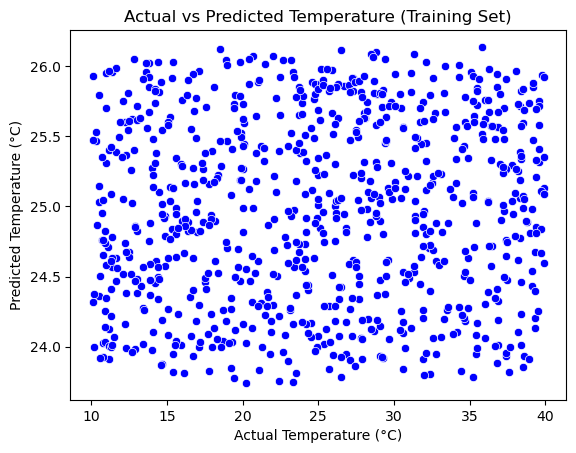

In [21]:
# scatter plotting
import matplotlib.pyplot as plt

plt.scatter(y_train,y_pred_linear, color='b', edgecolors='w', linewidth=0.5)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature (Training Set)')
plt.show()

<h1>Polynomial Ridge Regression</h1>

In [22]:
# polynomial feature for prediction

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly = PolynomialFeatures(degree=2)

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

# Combine polynomial features with Ridge regression
model = make_pipeline(poly, ridge)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred_poly_ridge = model.predict(x_train)

# Evaluate the model
mse_poly_ridge = mean_squared_error(y_train, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_train, y_pred_poly_ridge)

print(f"Polynomial Ridge Regression - Mean Squared Error: {mse_poly_ridge}")
print(f"Polynomial Ridge Regression - R^2 Score: {r2_poly_ridge}")


Polynomial Ridge Regression - Mean Squared Error: 75.03906767111661
Polynomial Ridge Regression - R^2 Score: 0.010406017786183663


<h1>KNN</h1>

In [23]:
# k nearest neighbour
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
# make predictions by train
y_pred_knn = knn_model.predict(x_train)
y_pred_knn

array([32.16666667, 26.6       , 30.63333333, 21.76666667, 14.06666667,
       19.96666667, 25.63333333, 20.56666667, 26.23333333, 25.86666667,
       23.83333333, 16.4       , 30.43333333, 22.63333333, 25.56666667,
       26.96666667, 31.5       , 16.16666667, 26.16666667, 24.9       ,
       28.36666667, 27.83333333, 17.76666667, 30.33333333, 26.06666667,
       17.        , 23.8       , 23.83333333, 19.23333333, 26.03333333,
       24.5       , 18.16666667, 24.        , 29.26666667, 19.2       ,
       30.53333333, 26.86666667, 30.93333333, 31.29656912, 28.1       ,
       26.2       , 14.06666667, 32.93333333, 24.2       , 23.1       ,
       14.56666667, 26.93333333, 20.46666667, 22.2       , 23.7       ,
       21.36666667, 23.83333333, 28.06666667, 14.4       , 22.26666667,
       32.96666667, 30.43333333, 35.33333333, 23.5       , 30.4       ,
       22.46323579, 26.86666667, 20.1       , 19.9       , 29.43333333,
       23.5       , 22.23333333, 26.96666667, 25.23333333, 28.46

In [25]:
# evaluate the model
mse_knn = mean_squared_error(y_train, y_pred_knn)
mse_knn

48.014995712731995

In [26]:
# evaluate the model
r2_knn = r2_score(y_train, y_pred_knn)
r2_knn

0.36679182873655336

<h1>K Mean</h1>

In [27]:
# k mean clustering
from sklearn.cluster import KMeans

# making clusters
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

G:\Semester 4\Big data\Anaconda download\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [28]:
# predict cluster label
labels = kmeans_model.labels_

In [29]:
weather['clusters'] = labels
weather

City        Date  Temperature (°C) Weather Description  \
0    Islamabad  25-12-2021         25.900000          Few clouds   
1       Quetta  05-12-2022         33.600000                Rain   
2     Peshawar  23-12-2020         10.500000          Few clouds   
3    Islamabad  26-02-2024         30.600000        Thunderstorm   
4      Karachi  29-07-2024         28.800000            Overcast   
..         ...         ...               ...                 ...   
995     Quetta  09-01-2022         36.500000          Few clouds   
996    Karachi  04-06-2024         32.000000            Overcast   
997     Quetta  28-10-2021         33.300000            Overcast   
998     Lahore  13-03-2022         24.989707            Overcast   
999    Karachi  31-12-2023         12.700000                Rain   

     Humidity (%)  Wind Speed (km/h)  clusters  
0            90.0              10.44         1  
1            34.0              41.76         2  
2            61.0              43.92         2  
3            32.0              12.96         0  
4            63.0              15.12         0  
..            ...                ...       ...  
995          93.0              39.60         1  
996          21.0              13.32         0  
997          30.0              47.16         2  
998          71.0              39.60         1  
999          61.0              42.84         2  

[1000 rows x 7 columns]

In [30]:
# euclidean distance accross clusters
inertia = kmeans_model.inertia_
inertia

287190.992182351

In [31]:
# silhouette score - to identify quality of clusters
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X,labels)
silhouette

0.39923448053050337

<h1>Comparison B/W Models</h1>

In [32]:
# comparison between different models
print("Comparison of Models:")
print(f"Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}")
print(f"Polynomial Ridge Regression - Mean Squared Error: {mse_poly_ridge}, R^2 Score: {r2_poly_ridge}")
print(f"KNN Regression - Mean Squared Error: {mse_knn}, R^2 Score: {r2_knn}")
print(f"K-Means Clustering - Inertia: {inertia},  Silhouette Score: {silhouette}")

Comparison of Models:
Linear Regression - Mean Squared Error: 75.40079692573981, R^2 Score: 0.005635634775367215
Polynomial Ridge Regression - Mean Squared Error: 75.03906767111661, R^2 Score: 0.010406017786183663
KNN Regression - Mean Squared Error: 48.014995712731995, R^2 Score: 0.36679182873655336
K-Means Clustering - Inertia: 287190.992182351,  Silhouette Score: 0.39923448053050337


According to above metric values of scores of models, k- mean clustering gives the most accurate prediction because the score is closest to 1 out of all the models so this model works better

In [37]:
pip install dash plotly

Note: you may need to restart the kernel to use updated packages.


In [33]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
from dash.dependencies import Input, Output

model_results = {
    'Linear Regression': {'MSE': mse_linear, 'R2': r2_linear, 'predictions': y_pred_linear},
    'Polynomial Ridge Regression': {'MSE': mse_poly_ridge, 'R2': r2_poly_ridge, 'predictions': y_pred_poly_ridge},
    'KNN Regression': {'MSE': mse_knn, 'R2': r2_knn, 'predictions': y_pred_knn},
    'KMeans Clustering': {'Inertia': inertia, 'Silhouette Score': silhouette, 'labels': labels}
}

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of Dash app
app.layout = html.Div([
    html.H1('Model Comparison Dashboard'),
    
    dcc.Dropdown(
        id='model-dropdown',
        options=[{'label': model, 'value': model} for model in model_results.keys()],
        value='Linear Regression',
        clearable=False
    ),
    
    dcc.Graph(id='performance-graph'),
    
    dcc.Graph(id='scatter-plot')
])

# Callback to update the graphs based on selected model
@app.callback(
    [Output('performance-graph', 'figure'),
     Output('scatter-plot', 'figure')],
    [Input('model-dropdown', 'value')]
)
def update_graphs(selected_model):
    
    if selected_model == 'KMeans Clustering':
        performance_fig = go.Figure(
            data=[
                go.Bar(name='Inertia', x=[selected_model], y=[model_results[selected_model]['Inertia']]),
                go.Bar(name='Silhouette Score', x=[selected_model], y=[model_results[selected_model]['Silhouette Score']])
            ],
            layout=go.Layout(
                title='Clustering Performance',
                barmode='group'
            )
        )
        
        # Scatter plot for KMeans Clustering
        scatter_fig = go.Figure(
            data=[
                go.Scatter(
                    x=y_test, 
                    y=model_results[selected_model]['labels'], 
                    mode='markers', 
                    marker=dict(color='blue', opacity=0.6),
                    name='Cluster Labels'
                )
            ],
            layout=go.Layout(
                title='Actual vs Cluster Labels',
                xaxis=dict(title='Actual Temperature (°C)'),
                yaxis=dict(title='Cluster Labels')
            )
        )
    else:
        performance_fig = go.Figure(
            data=[
                go.Bar(name='MSE', x=[selected_model], y=[model_results[selected_model]['MSE']]),
                go.Bar(name='R2', x=[selected_model], y=[model_results[selected_model]['R2']])
            ],
            layout=go.Layout(
                title='Model Performance',
                barmode='group'
            )
        )
        
        # Scatter plot of actual vs predicted values
        scatter_fig = go.Figure(
            data=[
                go.Scatter(
                    x=y_test, 
                    y=model_results[selected_model]['predictions'], 
                    mode='markers', 
                    marker=dict(color='blue', opacity=0.6),
                    name='Predictions'
                ),
                go.Scatter(
                    x=y_test, 
                    y=y_test, 
                    mode='lines', 
                    marker=dict(color='red'), 
                    name='Actual'
                )
            ],
            layout=go.Layout(
                title='Actual vs Predicted Values',
                xaxis=dict(title='Actual Temperature (°C)'),
                yaxis=dict(title='Predicted Temperature (°C)')
            )
        )
    
    return performance_fig, scatter_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
